<a href="https://colab.research.google.com/github/KhuyenLE-maths/CIFAR-10-recognition-with-CNN/blob/main/Visualization_covid_19_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [30]:
import os 
os.chdir('/content/drive/MyDrive/Visualization Covid-19/')

In [31]:
os.listdir(os.getcwd())

['datasets', 'Visualization covid 19 code.ipynb']

## 1. From epidemic to pandemic
<p><img style="float: left; margin:5px 20px 5px 1px; width:40%" src="https://www.nps.gov/aboutus/news/images/CDC-coronavirus-image-23311-for-web.jpg?maxwidth=650&autorotate=false"></p>
<p>In December 2019, COVID-19 coronavirus was first identified in the Wuhan region of China. By March 11, 2020, the World Health Organization (WHO) categorized the COVID-19 outbreak as a pandemic. A lot has happened in the months in between with major outbreaks in Iran, South Korea, and Italy. </p>
<p>We know that COVID-19 spreads through respiratory droplets, such as through coughing, sneezing, or speaking. But, how quickly did the virus spread across the globe? And, can we see any effect from country-wide policies, like shutdowns and quarantines? </p>
<p>Fortunately, organizations around the world have been collecting data so that governments can monitor and learn from this pandemic. Notably, the Johns Hopkins University Center for Systems Science and Engineering created a <a href="https://github.com/RamiKrispin/coronavirus">publicly available data repository</a> to consolidate this data from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries.</p>
<p>In this notebook, you will visualize COVID-19 data from the first several weeks of the outbreak to see at what point this virus became a global pandemic.</p>
<p><em>Please note that information and data regarding COVID-19 is frequently being updated. The data used in this project was pulled on March 17, 2020, and should not be considered to be the most up to date data available.</em></p>

Libraries 

In [32]:
import pandas as pd

In [33]:
cases_worldwide = pd.read_csv('datasets/confirmed_cases_worldwide.csv')
cases_worldwide.head()

,date,cum_cases
0,2020-01-22,555
1,2020-01-23,653
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [34]:
print(cases_worldwide.shape)

(56, 2)


## 2. Visualize the confirmed cases thoughout the world 

In [35]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

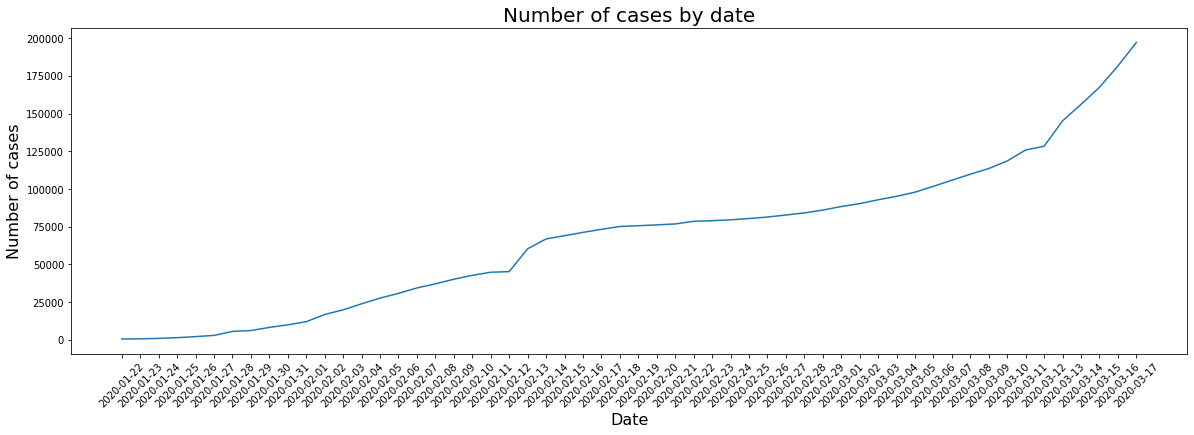

In [36]:
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(cases_worldwide['date'], cases_worldwide['cum_cases'])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Number of cases', fontsize = 16)
plt.title('Number of cases by date', fontsize = 20)

plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


The y-axis in that plot is pretty scary, with the total number of confirmed cases around the world approaching 200,000. Beyond that, some weird things are happening: there is an odd jump in mid February, then the rate of new cases slows down for a while, then speeds up again in March. We need to dig deeper to see what is happening.

## 3. China compared to the rest of the world
Early on in the outbreak, the COVID-19 cases were primarily centered in China. Let's plot confirmed COVID-19 cases in China and the rest of the world separately to see if it gives us any insight.

In [37]:
cases_china_world = pd.read_csv('datasets/confirmed_cases_china_vs_world.csv')
cases_china_world

,is_china,date,cases,cum_cases
0,China,2020-01-22,548,548
1,China,2020-01-23,95,643
2,China,2020-01-24,277,920
3,China,2020-01-25,486,1406
4,China,2020-01-26,669,2075
...,...,...,...,...
107,Not China,2020-03-13,16837,64248
108,Not China,2020-03-14,10872,75120
109,Not China,2020-03-15,11326,86446
110,Not China,2020-03-16,14052,100498


In [38]:
set(cases_china_world['is_china'])

{'China', 'Not China'}

Extracting from the data frame cases_china_world only the cases which belong to China 

In [39]:
cases_china = cases_china_world[cases_china_world['is_china'] == 'China']

In [40]:
print(cases_china.head())
print(cases_china.shape)

  is_china        date  cases  cum_cases
0    China  2020-01-22    548        548
1    China  2020-01-23     95        643
2    China  2020-01-24    277        920
3    China  2020-01-25    486       1406
4    China  2020-01-26    669       2075
(56, 4)


Extracting from the data frame cases_china_world the cases which belong to the world

In [41]:
cases_world = cases_china_world[cases_china_world['is_china'] == 'Not China']

In [42]:
print(cases_world.head())
print(cases_world.shape)

     is_china        date  cases  cum_cases
56  Not China  2020-01-22      7          7
57  Not China  2020-01-23      3         10
58  Not China  2020-01-24     11         21
59  Not China  2020-01-25      7         28
60  Not China  2020-01-26     15         43
(56, 4)


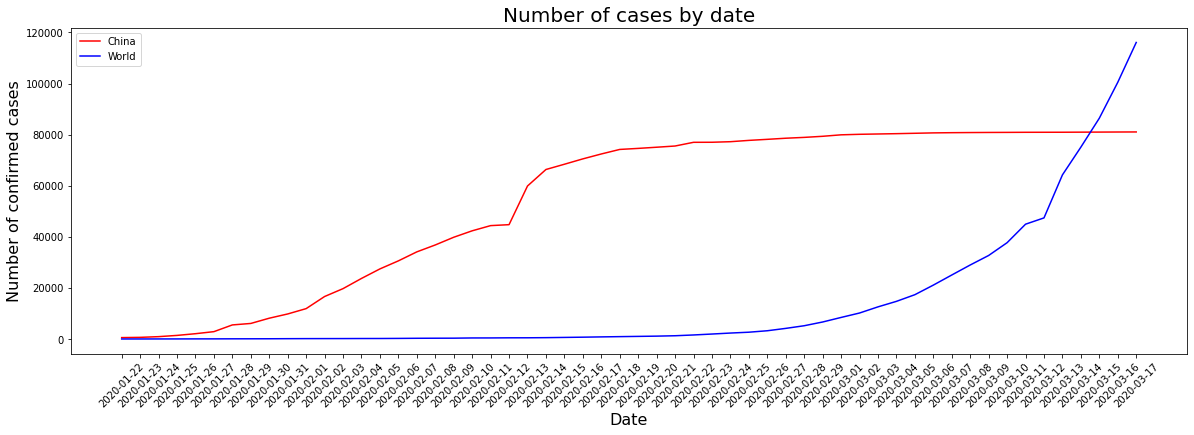

In [43]:
fig, ax = plt.subplots(figsize = (20,6))
ax.plot(cases_china['date'], cases_china['cum_cases'], label = 'China', color = 'red')
ax.plot(cases_world['date'], cases_world['cum_cases'], label = 'World', color = 'blue')
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Number of confirmed cases', fontsize = 16)
plt.title('Number of cases by date', fontsize = 20)
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


## 4. Number of confirmed cases by countries 

In [44]:
cases_by_country = pd.read_csv('datasets/confirmed_cases_by_country.csv')

In [45]:
cases_by_country

,country,province,date,cases,cum_cases
0,Afghanistan,NaN,2020-01-22,0,0
1,Albania,NaN,2020-01-22,0,0
2,Algeria,NaN,2020-01-22,0,0
3,Andorra,NaN,2020-01-22,0,0
4,Antigua and Barbuda,NaN,2020-01-22,0,0
...,...,...,...,...,...
13267,US,"Washington, D.C.",2020-03-17,0,6387
13268,US,West Virginia,2020-03-17,1,6388
13269,Australia,Western Australia,2020-03-17,3,452
13270,US,Wisconsin,2020-03-17,25,6413


Group the data frame above by countries 

In [46]:
cases_country_gp = cases_by_country.groupby('country').sum()

In [47]:
cases_country_gp

,cases,cum_cases
country,,
Afghanistan,22,117
Albania,55,266
Algeria,60,400
Andorra,39,55
Antigua and Barbuda,1,5
...,...,...
United Kingdom,1960,31914
Uruguay,29,45
Uzbekistan,10,17


Number of countries 

In [48]:
print(len(cases_country_gp))

151


Sort all countries by descending order of case number 

In [49]:
cases_country_gp_sort = cases_country_gp.sort_values(by = 'cum_cases', ascending= False)

In [50]:
cases_country_gp_sort 

,cases,cum_cases
country,,
US,6421,1313061
France,7699,312488
Italy,31506,202336
Iran,16169,133472
"Korea, South",8320,129476
...,...,...
Montenegro,2,2
Somalia,1,2
Liberia,1,2


## 5. Top 7 countries outside China which have the highest confirmed case number in March-2020

In [51]:
cases_top7 = pd.read_csv('datasets/confirmed_cases_top7_outside_china.csv')

In [52]:
cases_top7

,country,date,cum_cases
0,Germany,2020-02-18,16
1,Iran,2020-02-18,0
2,Italy,2020-02-18,3
3,"Korea, South",2020-02-18,31
4,Spain,2020-02-18,2
...,...,...,...
2025,US,2020-03-17,6387
2026,US,2020-03-17,6387
2027,US,2020-03-17,6388
2028,US,2020-03-17,6413


In [53]:
Countries = list(set(cases_top7['country']))

In [54]:
Countries

['Korea, South', 'Germany', 'Iran', 'US', 'France', 'Spain', 'Italy']

Visualize the confirmed case number of these countries 

In [55]:
cases_top7

,country,date,cum_cases
0,Germany,2020-02-18,16
1,Iran,2020-02-18,0
2,Italy,2020-02-18,3
3,"Korea, South",2020-02-18,31
4,Spain,2020-02-18,2
...,...,...,...
2025,US,2020-03-17,6387
2026,US,2020-03-17,6387
2027,US,2020-03-17,6388
2028,US,2020-03-17,6413


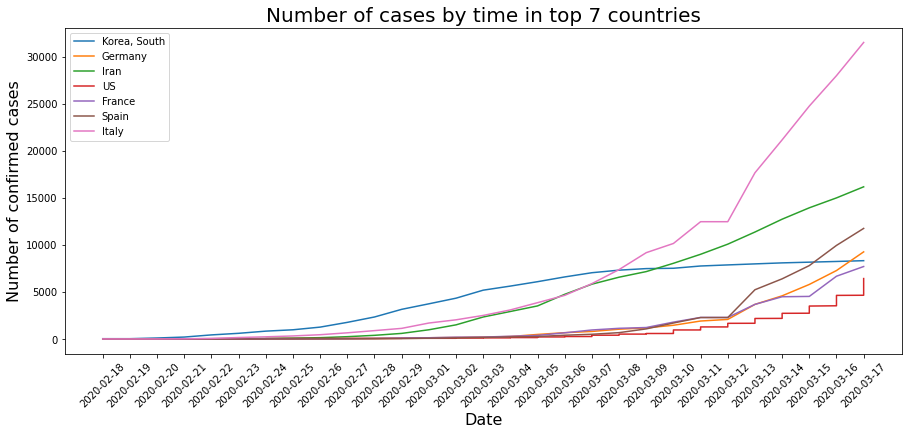

In [56]:
import numpy as np
fig, ax = plt.subplots(figsize = (15,6))
for i in np.arange(len(Countries)):
  Ct = Countries[i]
  ind = cases_top7['country'] == Ct
  ax.plot(cases_top7["date"][ind], cases_top7["cum_cases"][ind], label = Ct)

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Number of confirmed cases', fontsize = 16)
plt.title('Number of cases by time in top 7 countries', fontsize = 20)
plt.legend()
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()